In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import bamboolib as blb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
df=pd.read_csv("C:\\Users\\Radhika\\Downloads\\letters.csv")

In [6]:
print(df.isnull().sum())

label       0
pixel43     0
pixel44     0
pixel92     0
pixel124    0
pixel125    0
pixel126    0
pixel127    0
pixel128    0
pixel129    0
pixel130    0
pixel131    0
pixel132    0
pixel133    0
pixel134    0
pixel135    0
pixel136    0
pixel137    0
pixel138    0
pixel146    0
pixel147    0
pixel148    0
pixel149    0
pixel150    0
pixel151    0
pixel152    0
pixel153    0
pixel154    0
pixel155    0
pixel156    0
pixel157    0
pixel158    0
pixel159    0
pixel160    0
pixel327    0
pixel328    0
pixel329    0
pixel351    0
pixel410    0
pixel411    0
pixel412    0
pixel413    0
pixel414    0
pixel415    0
pixel416    0
pixel417    0
dtype: int64


In [7]:
df.duplicated().sum()

1633

In [8]:
df = df.drop_duplicates(keep='first')
df = df.dropna()
df

       label  pixel43  pixel44  pixel92  pixel124  pixel125  pixel126  \
0          1        0        0        0         0         0         0   
1          0        0        0        0       137       137       192   
2          1        0        0        0         3       141       139   
3          4        0        0        0         0         0         0   
4          0        0        0        0       155       254       254   
...      ...      ...      ...      ...       ...       ...       ...   
41995      2        0        0        1       248       253       176   
41996      0        0        0        0         0         0         0   
41997      2        0        0        0       255       255       191   
41998      2        0        0        0       255       128         0   
41999      2        0        0      227       253       229       133   

       pixel127  pixel128  pixel129  ...  pixel329  pixel351  pixel410  \
0             0         0         0  ...         

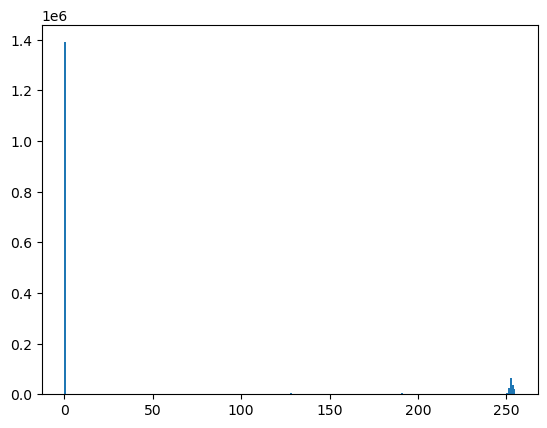

In [9]:
import matplotlib.pyplot as plt

# Plot a histogram of the pixel values
plt.hist(df.iloc[:,1:].values.flatten(), bins=256)
plt.show()

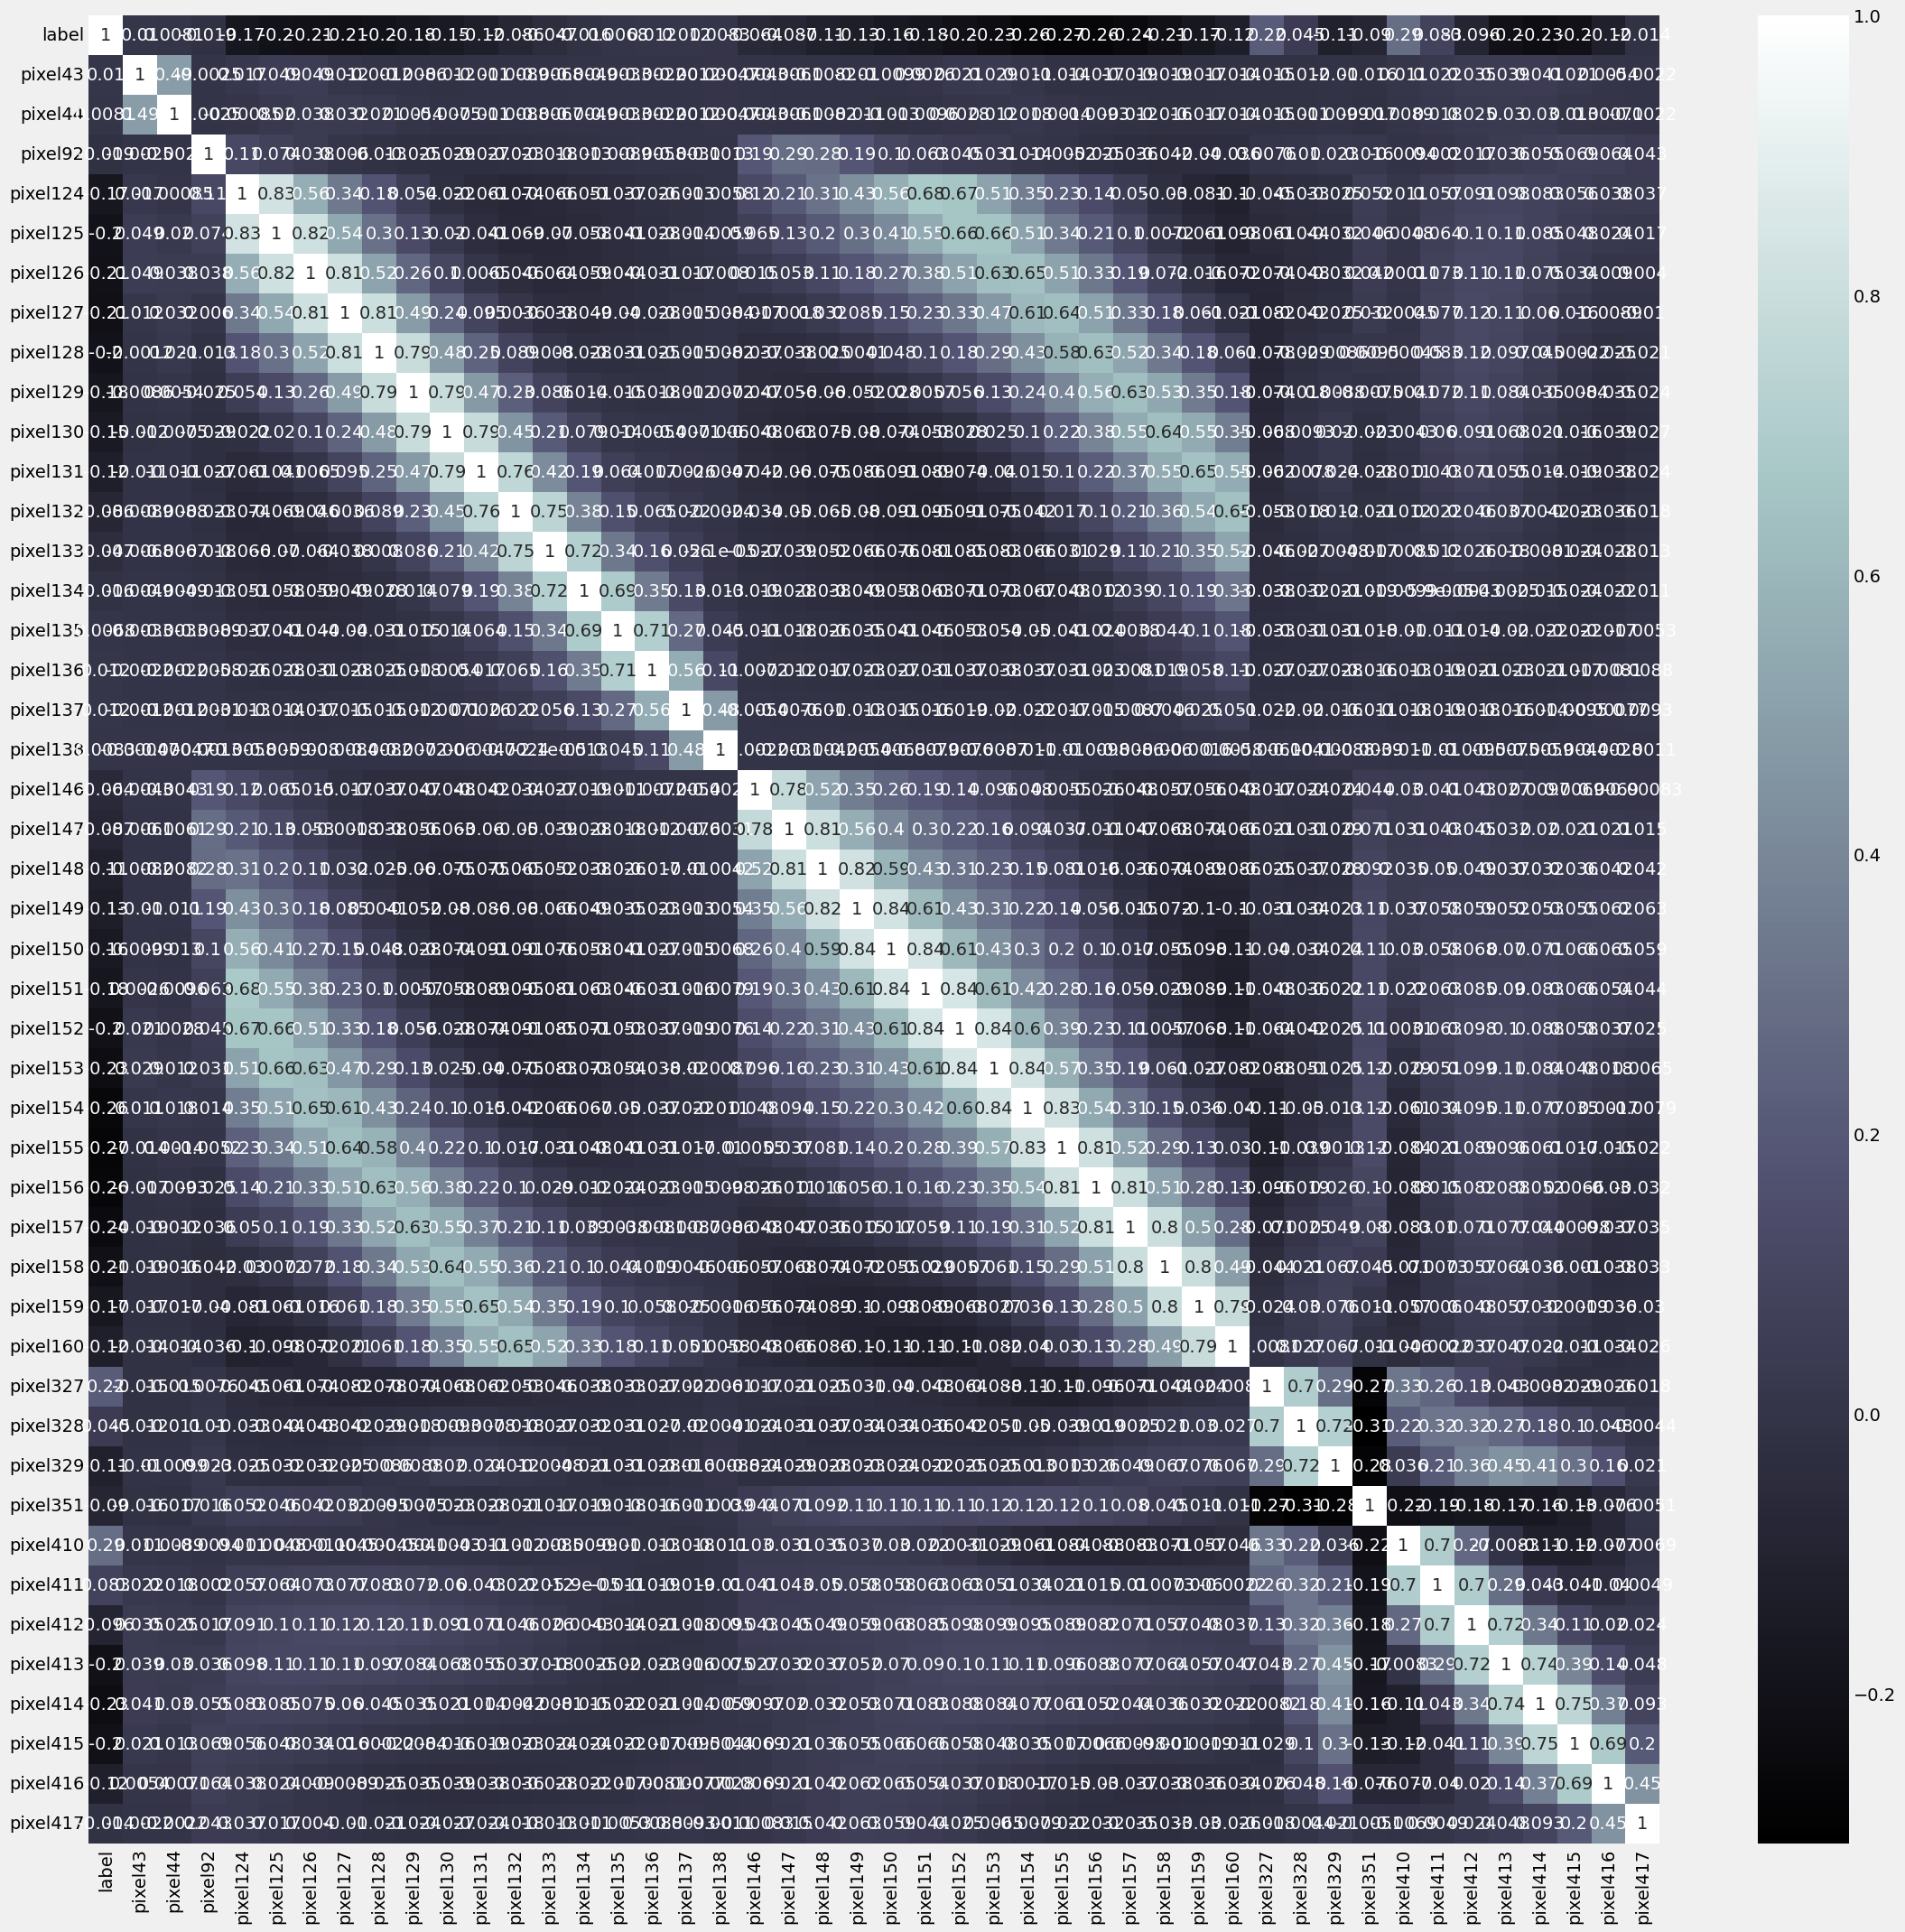

In [46]:
from matplotlib import pyplot as plt
corr = df.corr()
corrMatrix = df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corrMatrix, annot = True, cmap="bone")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Split the dataset into features (X) and label (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Build the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training set
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN accuracy:", accuracy_knn)


KNN accuracy: 0.6519692841218727


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6519692841218727
Precision: 0.6490484153760253
Recall: 0.6519692841218727


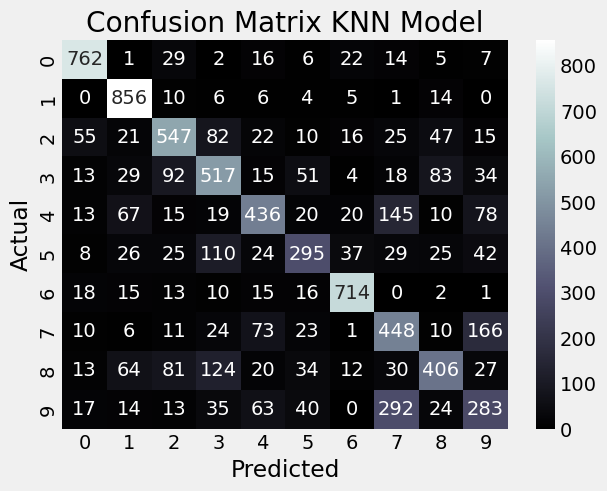

In [36]:
cnf_m = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
sns.heatmap(cnf_m, annot=True, fmt='d', cmap='bone')
plt.title('Confusion Matrix KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))
accuracy_model = accuracy_score(y_test, y_pred_knn)
print(accuracy_model)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       864
           1       0.78      0.95      0.86       902
           2       0.65      0.65      0.65       840
           3       0.56      0.60      0.58       856
           4       0.63      0.53      0.58       823
           5       0.59      0.48      0.53       621
           6       0.86      0.89      0.87       804
           7       0.45      0.58      0.51       772
           8       0.65      0.50      0.57       811
           9       0.43      0.36      0.39       781

    accuracy                           0.65      8074
   macro avg       0.64      0.64      0.64      8074
weighted avg       0.65      0.65      0.65      8074

0.6519692841218727


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Build the Random Forest model
rnf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training set
rnf.fit(X_train, y_train)

# Predict on the test set
y_pred_rnf = rnf.predict(X_test)



In [22]:
# Evaluate the model
accuracy_rnf = accuracy_score(y_test, y_pred_rnf)
print("Random Forest accuracy:", accuracy_rnf)

Random Forest accuracy: 0.6940797621996532


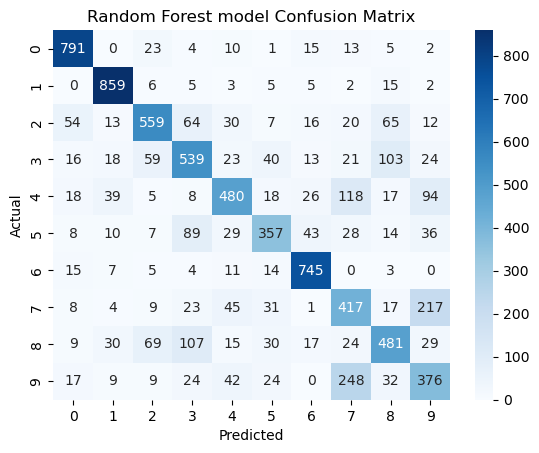

In [23]:
# Generate confusion matrix for model 1
cm = confusion_matrix(y_test, y_pred_rnf)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# Calculate accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_rnf)
precision = precision_score(y_test, y_pred_rnf, average='weighted')
recall = recall_score(y_test, y_pred_rnf, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6940797621996532
Precision: 0.6931594773276447
Recall: 0.6940797621996532


In [25]:
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rnf))
accuracy_model = accuracy_score(y_test, y_pred_rnf)
print(accuracy_model)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       864
           1       0.87      0.95      0.91       902
           2       0.74      0.67      0.70       840
           3       0.62      0.63      0.63       856
           4       0.70      0.58      0.64       823
           5       0.68      0.57      0.62       621
           6       0.85      0.93      0.88       804
           7       0.47      0.54      0.50       772
           8       0.64      0.59      0.62       811
           9       0.47      0.48      0.48       781

    accuracy                           0.69      8074
   macro avg       0.69      0.69      0.69      8074
weighted avg       0.69      0.69      0.69      8074

0.6940797621996532


[0.0001250206659390166, 0.0001500160073717274, 0.0019266351751480073, 0.014096192667154695, 0.01550592557461226, 0.015348820117347443, 0.01674383835584847, 0.016525075756907214, 0.013616723546938252, 0.012907461847084684, 0.009229148671362868, 0.0067371432255898655, 0.005482015877270841, 0.0039809403186102646, 0.0023769002677653285, 0.001068312744359925, 0.0003216001233635279, 3.2496966012181314e-05, 0.0026932113158856007, 0.00553156527600286, 0.00935298742564864, 0.015518902780957973, 0.019777206631923193, 0.02405235138285776, 0.026549542721355, 0.02692769777764581, 0.02995054037271624, 0.03425438724750002, 0.034422895268581215, 0.03094666679055183, 0.029613173708507263, 0.02437807045027581, 0.027061606349428047, 0.0736247205979745, 0.047466626484389075, 0.03981027032796631, 0.10686262404129022, 0.09193233055232712, 0.05304384805837446, 0.038503228147814206, 0.028725067178109933, 0.02278681358117405, 0.013496329215816592, 0.0053820729743738775, 0.0011609954318657744]


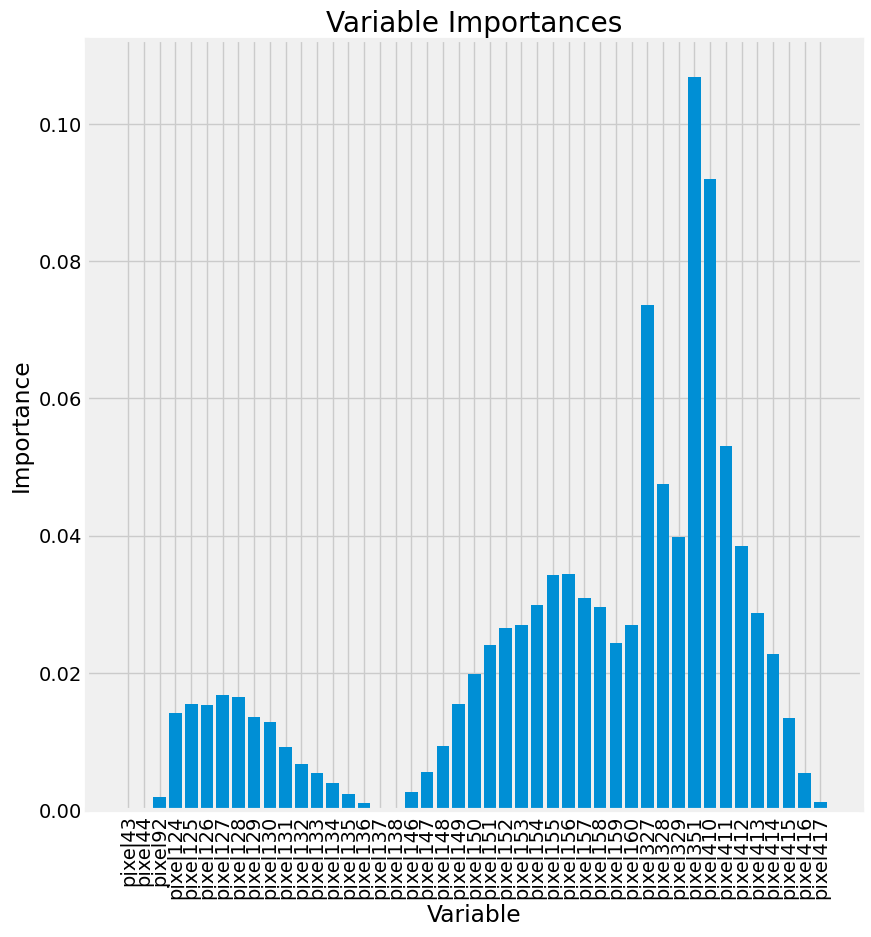

In [26]:
# Get numerical feature importances
importances = list(rnf.feature_importances_)
print(importances)

# Import matplotlib for plotting 
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(10, 10))

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
X_values = list(range(len(importances)))


# Make a bar chart
plt.bar(X_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(X_values, X.columns, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [27]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [31]:
from sklearn.preprocessing import StandardScaler

unscaled_features=X_train
sc=StandardScaler()
X_train_array=sc.fit_transform(X_train.values)

#assign scaled data to dataframe
X_train= pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array=sc.transform(X_test.values)
X_test= pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', random_state=1, max_iter=1000).fit(X_train, y_train)
clf.score(X_test,y_test)

In [39]:
y_pred = clf.predict(X_test)

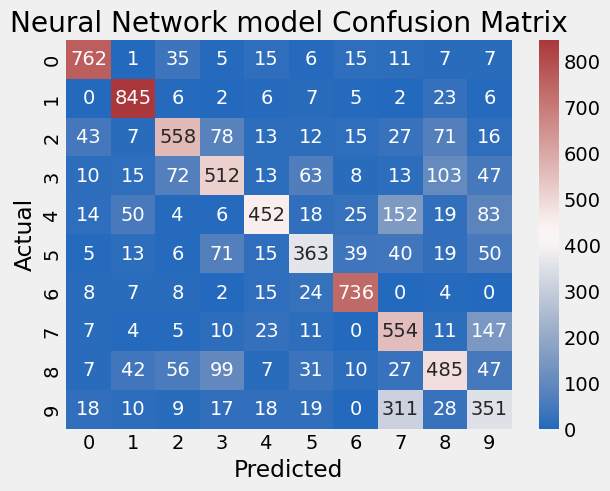

In [45]:
# Generate confusion matrix 
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='vlag')
plt.title('Neural Network model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
accuracy_model = accuracy_score(y_test, y_pred)
print(accuracy_model)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       864
           1       0.85      0.94      0.89       902
           2       0.74      0.66      0.70       840
           3       0.64      0.60      0.62       856
           4       0.78      0.55      0.65       823
           5       0.66      0.58      0.62       621
           6       0.86      0.92      0.89       804
           7       0.49      0.72      0.58       772
           8       0.63      0.60      0.61       811
           9       0.47      0.45      0.46       781

    accuracy                           0.70      8074
   macro avg       0.70      0.69      0.69      8074
weighted avg       0.70      0.70      0.69      8074

0.6958137230616794


In [ ]:
#creating a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", confusion)

sns.heatmap(confusion, annot = True, cmap="magma")
plt.show()

In [22]:
# Build the Neural Network model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))


In [23]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the training set
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
accuracy_nn = model.evaluate(X_test, y_test)[1]
print("Neural Network accuracy:", accuracy_nn)


Epoch 1/20
1050/1050 [==============================] - 6s 4ms/step - loss: 1.7495 - accuracy: 0.5524 - val_loss: 1.0875 - val_accuracy: 0.6332
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 1.0224 - accuracy: 0.6416 - val_loss: 1.0035 - val_accuracy: 0.6386
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.9521 - accuracy: 0.6603 - val_loss: 0.9722 - val_accuracy: 0.6674
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.9181 - accuracy: 0.6699 - val_loss: 0.9356 - val_accuracy: 0.6668
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.8927 - accuracy: 0.6767 - val_loss: 0.9369 - val_accuracy: 0.6685
Epoch 6/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.8798 - accuracy: 0.6842 - val_loss: 0.9123 - val_accuracy: 0.6840
Epoch 7/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.8595 - accuracy: 0.6913 - val_loss: 0.9061 - val_accuracy: